<a href="https://colab.research.google.com/github/Sagnik-SB/CODSOFT/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tropikexe","key":"f3a4fd225643fdefa1d7ee9b929511a8"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d adrianmcmahon/imdb-india-movies

Dataset URL: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies
License(s): CC0-1.0
  0% 0.00/494k [00:00<?, ?B/s]
100% 494k/494k [00:00<00:00, 1.19GB/s]


In [7]:
import zipfile

with zipfile.ZipFile("imdb-india-movies.zip","r") as zip_ref:
    zip_ref.extractall("imdb_data")

In [10]:
import os
os.listdir("imdb_data")

['IMDb Movies India.csv']

In [16]:
import pandas as pd

file = "imdb_data/IMDb Movies India.csv"

df = pd.read_csv(file, encoding='latin1')
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [18]:
# Cell 1: read files
import pandas as pd, io, os
file = "imdb_data/IMDb Movies India.csv"

# show files in imdb_data to confirm
print("Files:", os.listdir("imdb_data"))

# Trying multiple encodings
encodings = ['utf-8', 'utf-8-sig', 'latin1', 'cp1252', 'iso-8859-1']
for enc in encodings:
    try:
        df = pd.read_csv(file, encoding=enc, engine='python', low_memory=False)
        print(f"Successfully read with encoding: {enc}")
        break
    except Exception as e:
        print(f"{enc} failed: {e}")
else:
    # final fallback: replace invalid bytes
    print("All encodings failed; using fallback decode(replace).")
    with open(file, 'rb') as f:
        text = f.read().decode('utf-8', errors='replace')
    df = pd.read_csv(io.StringIO(text))

print("\nNumber of rows:", len(df))
print("\nColumns found:")
print(df.columns.tolist())

display(df.head(3))

Files: ['IMDb Movies India.csv']
utf-8 failed: The 'low_memory' option is not supported with the 'python' engine
utf-8-sig failed: The 'low_memory' option is not supported with the 'python' engine
latin1 failed: The 'low_memory' option is not supported with the 'python' engine
cp1252 failed: The 'low_memory' option is not supported with the 'python' engine
iso-8859-1 failed: The 'low_memory' option is not supported with the 'python' engine
All encodings failed; using fallback decode(replace).

Number of rows: 15509

Columns found:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [19]:
# Cell 2
import difflib

cols = df.columns.tolist()

candidates = {
    'genre': ['genre','genres','Genre','Genres','movie_genres'],
    'director': ['director','directors','Director','Directed By','directed_by','director_name'],
    'actors': ['actors','cast','stars','star_cast','cast_actors','actor','actors_list'],
    'year': ['year','Year','release_year','released','title_year','year_of_release'],
    'runtime': ['runtime','duration','run_time','length','time','movie_length'],
    'rating': ['rating','Rating','imdb_rating','avg_vote','score','imdb_rating']
}

def find_best(col_choices, all_cols):
    for c in col_choices:
        if c in all_cols: return c
    lowmap = {c.lower():c for c in all_cols}
    for c in col_choices:
        if c.lower() in lowmap: return lowmap[c.lower()]
    for cand in col_choices:
        matches = difflib.get_close_matches(cand, all_cols, n=1, cutoff=0.65)
        if matches: return matches[0]
    return None

mapped = {}
for key, choices in candidates.items():
    best = find_best(choices, cols)
    mapped[key] = best

print("Column mapping (standard -> dataset column):")
for k,v in mapped.items():
    print(f"  {k:8s} -> {v}")

# If rating (target) not found, then.....
if mapped['rating'] is None:
    raise RuntimeError("Could not find a column for 'rating' automatically. "
                       "Please check the printed column names and tell me which column is the rating.")

selected = {k:v for k,v in mapped.items() if v is not None}
print("\nWe'll use these dataset columns (existing):", selected)

Column mapping (standard -> dataset column):
  genre    -> Genre
  director -> Director
  actors   -> Actor 3
  year     -> Year
  runtime  -> Duration
  rating   -> Rating

We'll use these dataset columns (existing): {'genre': 'Genre', 'director': 'Director', 'actors': 'Actor 3', 'year': 'Year', 'runtime': 'Duration', 'rating': 'Rating'}


In [20]:
# Cell 3
import numpy as np, re

# helper parse functions
def first_item(s):
    if pd.isna(s): return np.nan
    s = str(s)
    # split
    parts = re.split(r'[|,;/\-\\\\]', s)
    return parts[0].strip() if parts and parts[0].strip()!='' else np.nan

def parse_runtime(s):
    if pd.isna(s): return np.nan
    s = str(s).lower()
    # pattern like '2h 10m' or '2 hr 10 min'
    m = re.search(r'(\d+)\s*h', s)
    if m:
        hrs = int(m.group(1))
        m2 = re.search(r'(\d+)\s*m', s)
        mins = int(m2.group(1)) if m2 else 0
        return hrs*60 + mins
    # pattern like '120 min' or '120'
    m = re.search(r'(\d+)', s)
    if m:
        return float(m.group(1))
    return np.nan

def parse_year(s):
    if pd.isna(s): return np.nan
    s = str(s)
    m = re.search(r'(19|20)\d{2}', s)
    if m: return int(m.group(0))
    # fallback: try cast
    try:
        y = int(s)
        if 1800 < y < 2100: return y
    except:
        pass
    return np.nan

# Building the standardized DF
std = pd.DataFrame()
if mapped.get('genre') is not None:
    std['genre'] = df[mapped['genre']].astype(str).apply(first_item)
else:
    std['genre'] = 'Unknown'

if mapped.get('director') is not None:
    std['director'] = df[mapped['director']].astype(str).apply(first_item)
else:
    std['director'] = 'Unknown'

if mapped.get('actors') is not None:
    std['actor'] = df[mapped['actors']].astype(str).apply(first_item)
else:
    std['actor'] = 'Unknown'

if mapped.get('runtime') is not None:
    std['runtime'] = df[mapped['runtime']].apply(parse_runtime)
else:
    std['runtime'] = np.nan

# year
if mapped.get('year') is not None:
    std['year'] = df[mapped['year']].apply(parse_year)
else:
    std['year'] = np.nan

std['rating'] = pd.to_numeric(df[mapped['rating']], errors='coerce')

print("After parsing, sample:")
display(std.head(5))
print("\nMissing values per column:")
print(std.isnull().sum())

After parsing, sample:


,genre,director,actor,runtime,year,rating
0,Drama,J.S. Randhawa,Rajendra Bhatia,NaN,NaN,NaN
1,Drama,Gaurav Bakshi,Arvind Jangid,109.0,2019.0,7.0
2,Drama,Soumyajit Majumdar,Roy Angana,90.0,2021.0,NaN
3,Comedy,Ovais Khan,Siddhant Kapoor,110.0,2019.0,4.4
4,Drama,Amol Palekar,Antara Mali,105.0,2010.0,NaN



Missing values per column:
genre          0
director       0
actor          0
runtime     8269
year         528
rating      7590
dtype: int64


In [21]:
# Cell 4

# Drop rows without target rating
before = len(std)
std = std[~std['rating'].isna()].copy()
print(f"Dropped {before - len(std)} rows with missing rating; {len(std)} rows remain.")

# Fill runtime with median
std['runtime'] = std['runtime'].fillna(std['runtime'].median())

# Fill year with median or a reasonable value
std['year'] = std['year'].fillna(std['year'].median())

# Replacing empty strings and fill categorical NaNs
for col in ['genre','director','actor']:
    std[col] = std[col].replace({'nan':np.nan})
    std[col] = std[col].fillna('Unknown').astype(str)

# Limit high-cardinality for director/actor: top-k, others as 'Other'
top_directors = std['director'].value_counts().nlargest(50).index
std['director'] = std['director'].where(std['director'].isin(top_directors), other='Other')

top_actors = std['actor'].value_counts().nlargest(100).index
std['actor'] = std['actor'].where(std['actor'].isin(top_actors), other='Other')

encoded = pd.get_dummies(std, columns=['genre','director','actor'], drop_first=True)

print("Encoded shape:", encoded.shape)
display(encoded.head(3))

Dropped 7590 rows with missing rating; 7919 rows remain.
Encoded shape: (7919, 173)


,runtime,year,rating,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,...,actor_Suresh Oberoi,actor_Tabu,actor_Tanuja,actor_Unknown,actor_Urmila Matondkar,actor_Utpal Dutt,actor_Vijayendra Ghatge,actor_Vinod Khanna,actor_Vinod Mehra,actor_Zeenat Aman
1,109.0,2019.0,7.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,110.0,2019.0,4.4,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,147.0,1997.0,4.7,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = rf.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# R2 Score
print("R2:", r2_score(y_test, y_pred))

MSE: 1.7193496052723767
RMSE: 1.3112397207499384
R2: 0.07519344902886127


In [24]:
# Saving to use later
import joblib
joblib.dump(rf, "movie_rating_rf.pkl")
print("Saved movie_rating_rf.pkl")

Saved movie_rating_rf.pkl


In [25]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
print(results.head(20))

       Actual  Predicted
9456      3.3   6.116000
14816     5.3   4.842000
3213      5.7   7.019678
3778      7.2   4.406511
5775      3.5   5.878556
12203     7.2   5.354156
12305     3.8   6.373641
4650      6.9   5.616667
8701      5.2   6.581363
4707      7.4   5.112322
6764      4.3   6.284165
4809      7.2   5.018667
11742     5.6   5.111964
12964     3.9   4.525633
11514     3.2   3.900827
512       6.4   5.045389
8306      5.8   7.358000
9232      6.4   6.842753
986       7.6   7.600667
2000      2.9   6.010872


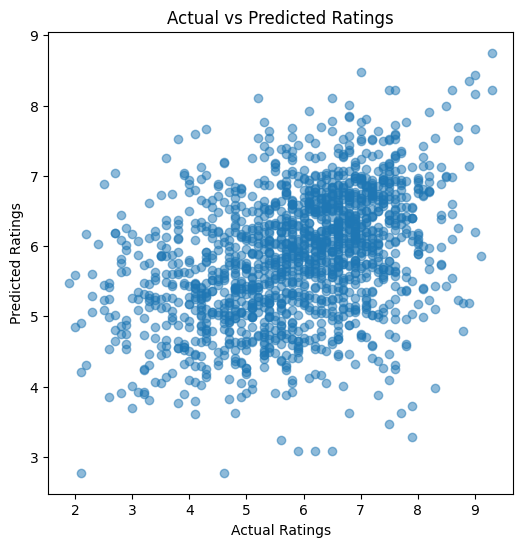

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

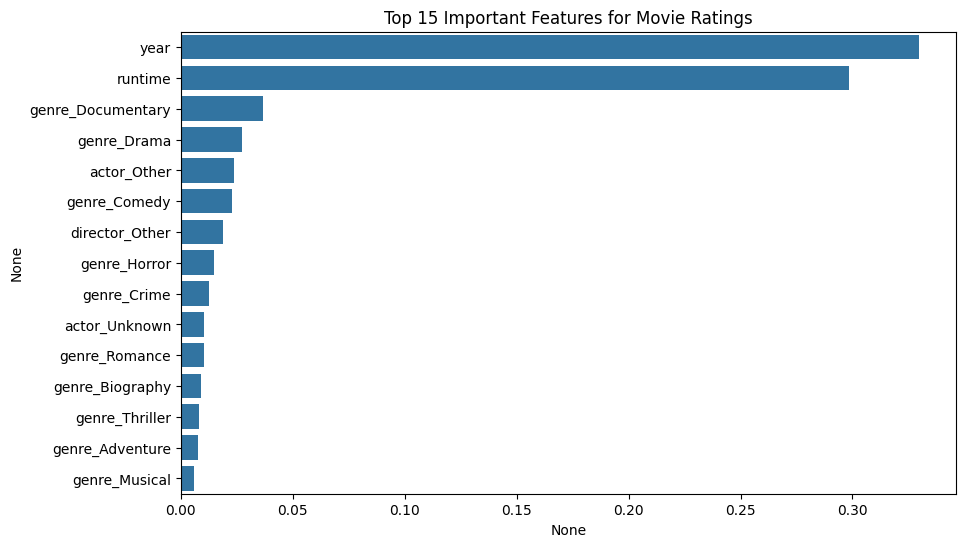

In [27]:
import seaborn as sns

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 15 Important Features for Movie Ratings")
plt.show()